<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/convertidor_buck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

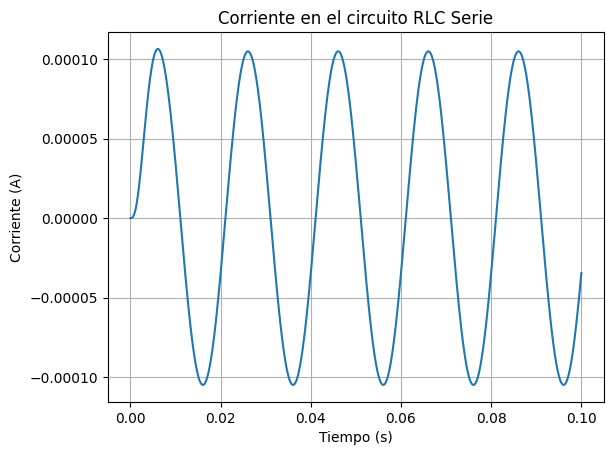

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros del circuito
R = 100  # Resistencia en ohmios
L = 0.1  # Inductancia en henrios
C = 10e-6  # Capacitancia en faradios
V0 = 10  # Amplitud de la fuente senoidal (en voltios)
f = 50  # Frecuencia de la fuente (en Hz)

# Definir la ecuación diferencial del circuito RLC serie
# La ecuación es: L*d2i/dt2 + R*di/dt + (1/C)*i = V0*sin(2*pi*f*t)
def circuito_RLC(y, t, R, L, C, V0, f):
    i, di_dt = y
    d2i_dt2 = (V0 * np.sin(2 * np.pi * f * t) - R * di_dt - (1 / C) * i) / L
    return [di_dt, d2i_dt2]

# Condiciones iniciales: i(0) = 0 (corriente inicial), di/dt(0) = 0 (velocidad inicial)
y0 = [0, 0]

# Tiempo de simulación
t = np.linspace(0, 0.1, 1000)  # 0 a 0.1 segundos, 1000 puntos

# Resolver la ecuación diferencial
sol = odeint(circuito_RLC, y0, t, args=(R, L, C, V0, f))

# Extraer la corriente (i) de la solución
i = sol[:, 0]

# Graficar la corriente en el circuito RLC
plt.plot(t, i)
plt.title("Corriente en el circuito RLC Serie")
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.grid(True)
plt.show()


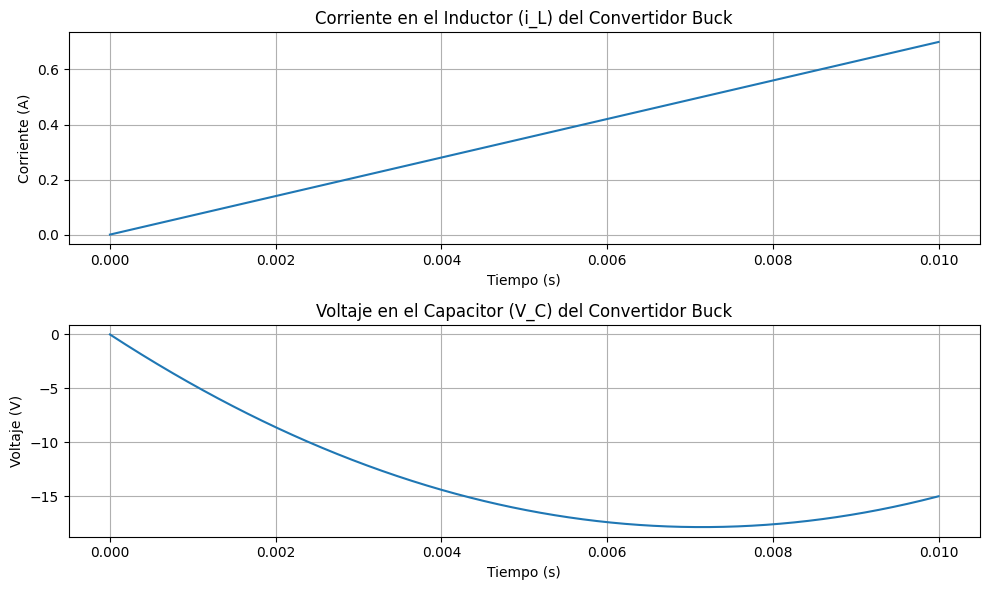

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros del convertidor buck
Vin = 12  # Voltaje de entrada en V
Vout = 5  # Voltaje de salida deseado en V
L = 0.1  # Inductancia en henrios
C = 100e-6  # Capacitancia en faradios
Rload = 10  # Resistencia de carga en ohmios
Iload = Vout / Rload  # Corriente de carga
fsw = 100e3  # Frecuencia de conmutación en Hz

# Ecuaciones diferenciales para el convertidor buck
def buck_converter(y, t, Vin, Vout, L, C, Rload):
    i_L, V_C = y  # i_L es la corriente en el inductor y V_C es el voltaje en el capacitor
    di_L_dt = (Vin - Vout) / L  # Ecuación de la corriente en el inductor
    dV_C_dt = (i_L - Iload) / C  # Ecuación de la tensión en el capacitor
    return [di_L_dt, dV_C_dt]

# Condiciones iniciales
i_L0 = 0  # Corriente inicial en el inductor
V_C0 = 0  # Voltaje inicial en el capacitor
y0 = [i_L0, V_C0]

# Tiempo de simulación (10 milisegundos)
t = np.linspace(0, 0.01, 1000)  # 10 ms, 1000 puntos

# Resolver la ecuación diferencial
sol = odeint(buck_converter, y0, t, args=(Vin, Vout, L, C, Rload))

# Extraer la corriente del inductor y el voltaje del capacitor
i_L = sol[:, 0]
V_C = sol[:, 1]

# Graficar la corriente en el inductor y el voltaje del capacitor
plt.figure(figsize=(10, 6))

# Corriente en el inductor
plt.subplot(2, 1, 1)
plt.plot(t, i_L)
plt.title("Corriente en el Inductor (i_L) del Convertidor Buck")
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.grid(True)

# Voltaje en el capacitor
plt.subplot(2, 1, 2)
plt.plot(t, V_C)
plt.title("Voltaje en el Capacitor (V_C) del Convertidor Buck")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.grid(True)

plt.tight_layout()
plt.show()
